In [1]:
import util
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = "DATA3/videos6/"

# load the images
imgs_rgb, imgs_ir = util.loadDataset2(path, "RGB_frames_noBlack", "IR_frames_noBlack")

In [3]:
imgs_ir.shape

(14866, 240, 320, 3)

In [4]:
# [beg_frame, end_frame, threshold_value]
th = [[0, 103, 130],
     [486, 802, 130],
     [1457, 1657, 130],
     [2145, 2325, 130],
     [2345, 2781, 130],
     [2915, 3736, 130],
     [4736, 4915, 160],
     [5456, 5928, 150],
     [6112, 6232, 150],
     [13030, 13064, 170],
     [13200, 13391, 170],
     [14075, 14115, 170],
     [14274, 14306, 170],
                        ]

In [5]:
# threshold the image in the th list 
thresh_img = []
begin = 4380
end = 4925
for e in th:
    for n in range(e[0], e[1]):
        test_thresh = imgs_ir[n, :, :, 0].copy()

        for i in range(0, test_thresh.shape[0]):
            for j in range(0, test_thresh.shape[1]):
                if test_thresh[i, j] > e[2]: #and test_thresh[i, j] < 150: (170)
                    test_thresh[i, j] = 0
                else:
                    test_thresh[i, j] = 255

        thresh_img.append(test_thresh)
thresh_img = np.array(thresh_img)

In [6]:
thresh_img.shape

(3124, 240, 320)

C:\Users\lucaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


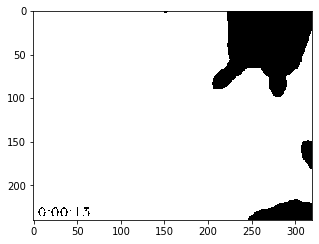

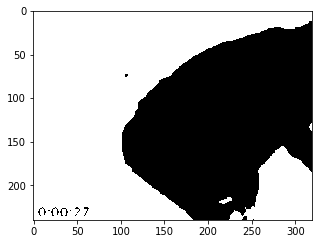

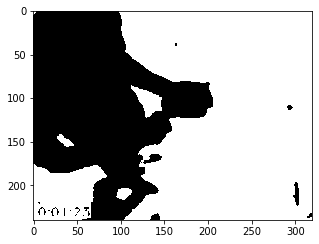

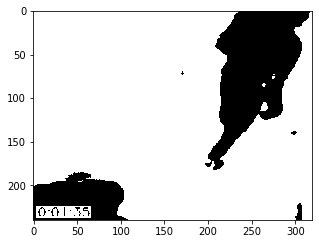

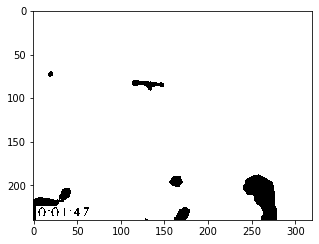

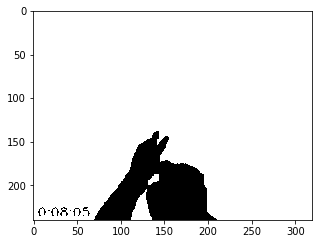

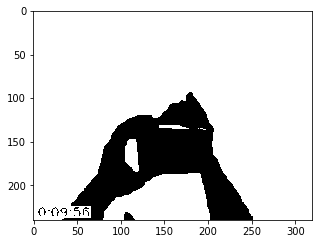

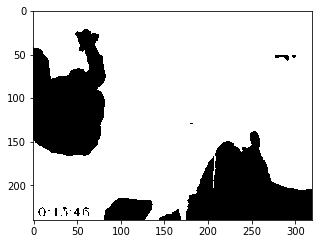

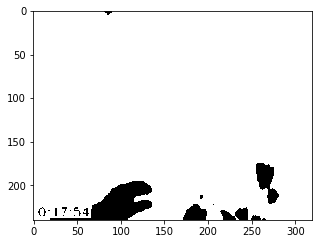

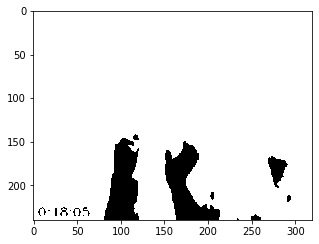

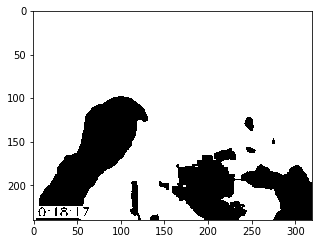

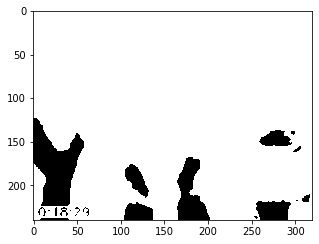

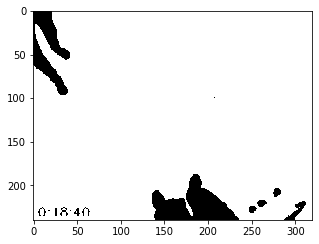

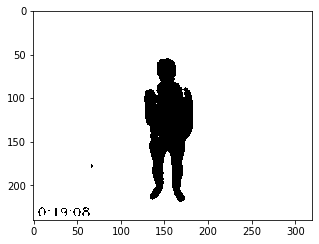

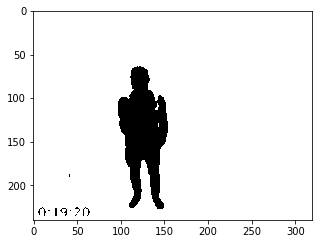

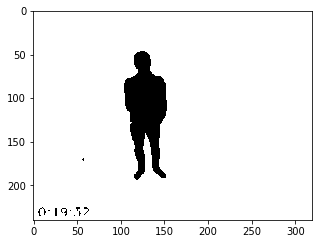

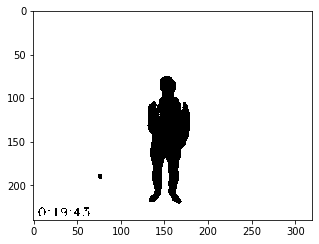

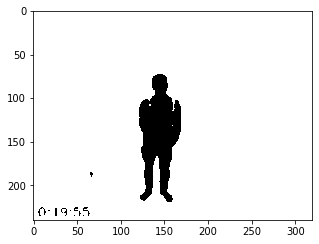

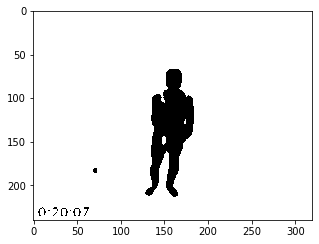

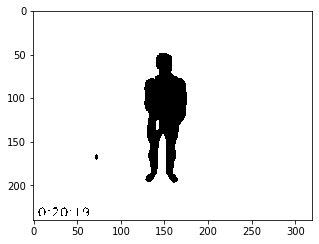

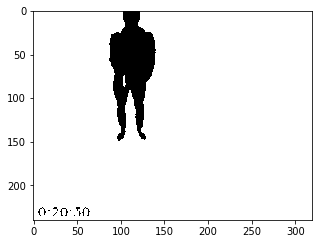

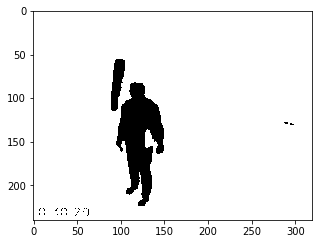

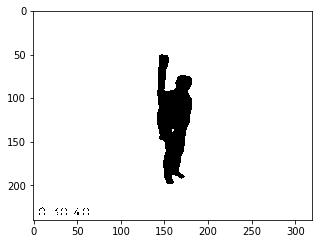

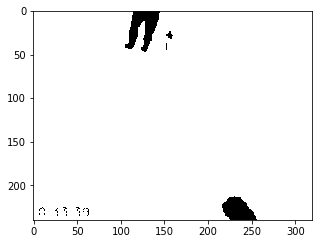

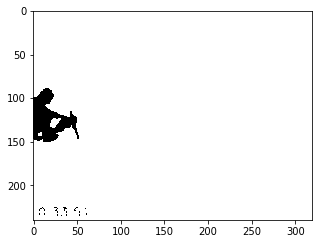

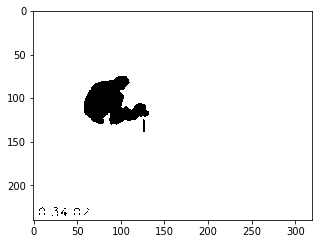

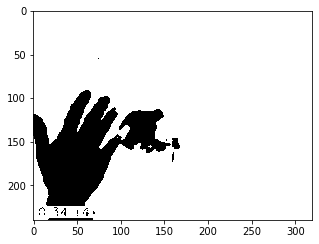

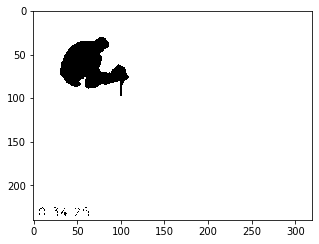

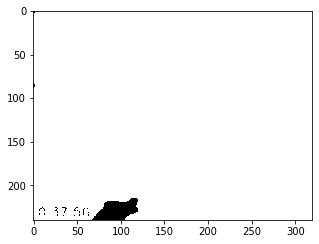

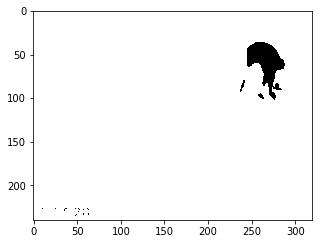

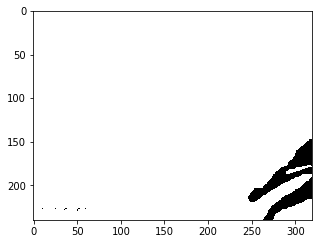

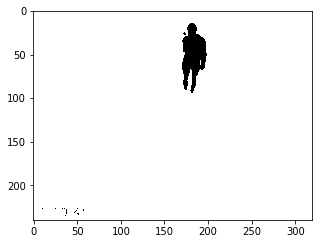

In [7]:
for i in range(0, thresh_img.shape[0], 100):
    plt.figure(figsize=(5,5))
    plt.imshow(thresh_img[i], cmap='gray')

In [8]:
util.saveImages(thresh_img, "DATA3/videos6/IR_mask")

In [9]:
imgs_to_thresh = []
imgs_ir_final = []
for e in th:
    for n in range(e[0], e[1]):
        test_thresh = imgs_rgb[n].copy()
        ir_final = imgs_ir[n].copy()
        imgs_to_thresh.append(test_thresh)
        imgs_ir_final.append(ir_final)
        
imgs_to_thresh = np.array(imgs_to_thresh)
imgs_ir_final = np.array(imgs_ir_final)

In [10]:
print(imgs_to_thresh.shape, imgs_ir_final.shape)

(3124, 240, 320, 3) (3124, 240, 320, 3)


In [ ]:
for i in range(0, imgs_to_thresh.shape[0], 30):
    plt.figure(figsize=(5,5))
    plt.imshow(imgs_to_thresh[i], cmap='gray')

In [11]:
util.saveImages(imgs_to_thresh, "DATA3/videos6/RGB_final")

In [12]:
util.saveImages(imgs_ir_final, "DATA3/videos6/IR_final")